##### Copyright 2020 The TensorFlow Authors.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

Init Plugin
Init Graph Optimizer
Init Kernel


In [2]:
# load data from path:
import os

b_path = '/Users/ryan/Desktop/Bad_ic'
g_path = '/Users/ryan/Documents/PCB_Image/images'
bimg_list = os.listdir(b_path)
gimg_list = os.listdir(g_path)
for gimg in gimg_list:
    if  gimg == 's01':
      path = os.listdir(os.path.join(g_path, gimg, 'DSLR', 'components', 'front', 'ICs'))
    elif gimg == 's30':
        path = os.listdir(os.path.join(g_path, gimg, 'DSLR', 'components', gimg +'_front', 'ICs'))
    elif gimg == 's10':  
        path = os.listdir(os.path.join(g_path, gimg, 'DSLR', 'components', gimg +'_front', 'ICs'))
    
    else:
        path = os.listdir(os.path.join(g_path, gimg, 'DSLR', 'components', gimg.replace('0', '') +'_front', 'ICs'))


In [3]:
import cv2
import imutils

IMG_SZE = 400

X, y = [], []
for files in bimg_list:
    img_array = cv2.imread(os.path.join(b_path,files), cv2.IMREAD_GRAYSCALE)
    img_array = cv2.resize(img_array, (IMG_SZE, IMG_SZE))
    img_array1 = np.array(img_array).reshape(IMG_SZE, IMG_SZE)

    X.append(img_array1)
    y.append('bad')
    
    image = imutils.rotate(img_array, angle=90)
    image = np.array(image).reshape(IMG_SZE, IMG_SZE)

    X.append(image)
    y.append('bad')

    image = imutils.rotate(img_array, angle=180)
    image = np.array(image).reshape(IMG_SZE, IMG_SZE)

    X.append(image)
    y.append('bad')

    image = imutils.rotate(img_array, angle=270)
    image = np.array(image).reshape(IMG_SZE, IMG_SZE)

    X.append(image)
    y.append('bad')

for gimg in gimg_list:
    if  gimg == 's01':
      path = os.path.join(g_path, gimg, 'DSLR', 'components', 'front', 'ICs')
    elif gimg == 's30':
        path = os.path.join(g_path, gimg, 'DSLR', 'components', gimg +'_front', 'ICs')
    elif gimg == 's10':  
        path = os.path.join(g_path, gimg, 'DSLR', 'components', gimg +'_front', 'ICs')
    
    else:
        path = os.path.join(g_path, gimg, 'DSLR', 'components', gimg.replace('0', '') +'_front', 'ICs')
    for _ in os.listdir(path):

        img_array = cv2.imread(os.path.join(path, _), cv2.IMREAD_GRAYSCALE)
        
        img_array = cv2.resize(img_array, (IMG_SZE, IMG_SZE))
        img_array1 = np.array(img_array).reshape(IMG_SZE, IMG_SZE)

        X.append(img_array1)
        y.append('bad')
        image = imutils.rotate(img_array, angle=90)
        image = np.array(image).reshape(IMG_SZE, IMG_SZE)

        X.append(image)
        y.append('good')

        image = imutils.rotate(img_array, angle=180)
        image = np.array(image).reshape(IMG_SZE, IMG_SZE)

        X.append(image)
        y.append('good')


        image = imutils.rotate(img_array, angle=270)
        image = np.array(image).reshape(IMG_SZE, IMG_SZE)

        X.append(image)
        y.append('good')

X = np.array(X)

In [43]:
X = X.astype('float32') / 255
labels = np.array([1 if it == 'good' else 0 for it in y])


pkl_dic_forimage = {'images': X, 'labels': labels}
import pickle
from typing import Protocol
with open('/Users/ryan/Documents/PCB_Image/image_data.pkl', 'wb') as f:
    pickle.dump(pkl_dic_forimage, f, protocol=pickle.HIGHEST_PROTOCOL)

In [44]:

x_train, x_test, y_train, y_test = train_test_split(X, labels, test_size = .20)
print (x_train.shape)
print (x_test.shape)

(560, 400, 400)
(140, 400, 400)


In [34]:
latent_dim = 64

class Autoencoder(Model):
  def __init__(self, latent_dim):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim   
    self.encoder = tf.keras.Sequential([
      layers.Flatten(),
      layers.Dense(latent_dim, activation='relu'),
    ])
    self.decoder = tf.keras.Sequential([
      layers.Dense(IMG_SZE**2, activation='sigmoid'),
      layers.Reshape((IMG_SZE, IMG_SZE))
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded
  
autoencoder = Autoencoder(latent_dim) 

In [35]:
# update model on new data only with a smaller learning rate
#opt = SGD(learning_rate=0.001, momentum=0.9)
# compile the model
#model.compile(optimizer=opt, loss='binary_crossentropy')

#autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [36]:
x_train.shape

(560, 400, 400)

In [40]:
autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=4,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/100
140/140 [==============================] - 4s 28ms/step - loss: 3.4170e-04 - val_loss: 3.0935e-04
Epoch 2/100
140/140 [==============================] - 4s 28ms/step - loss: 2.8295e-04 - val_loss: 2.5846e-04
Epoch 3/100
140/140 [==============================] - 4s 28ms/step - loss: 2.3812e-04 - val_loss: 2.1910e-04
Epoch 4/100
140/140 [==============================] - 4s 28ms/step - loss: 2.0307e-04 - val_loss: 1.8799e-04
Epoch 5/100
140/140 [==============================] - 4s 28ms/step - loss: 1.7513e-04 - val_loss: 1.6295e-04
Epoch 6/100
140/140 [==============================] - 4s 28ms/step - loss: 1.5246e-04 - val_loss: 1.4248e-04
Epoch 7/100
140/140 [==============================] - 4s 28ms/step - loss: 1.3380e-04 - val_loss: 1.2552e-04
Epoch 8/100
140/140 [==============================] - 4s 28ms/step - loss: 1.1825e-04 - val_loss: 1.1129e-04
Epoch 9/100
140/140 [==============================] - 4s 28ms/step - loss: 1.0515e-04 - val_loss: 9.9246e-05
Epoch 10/1

Now that the model is trained, let's test it by encoding and decoding images from the test set.

In [45]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

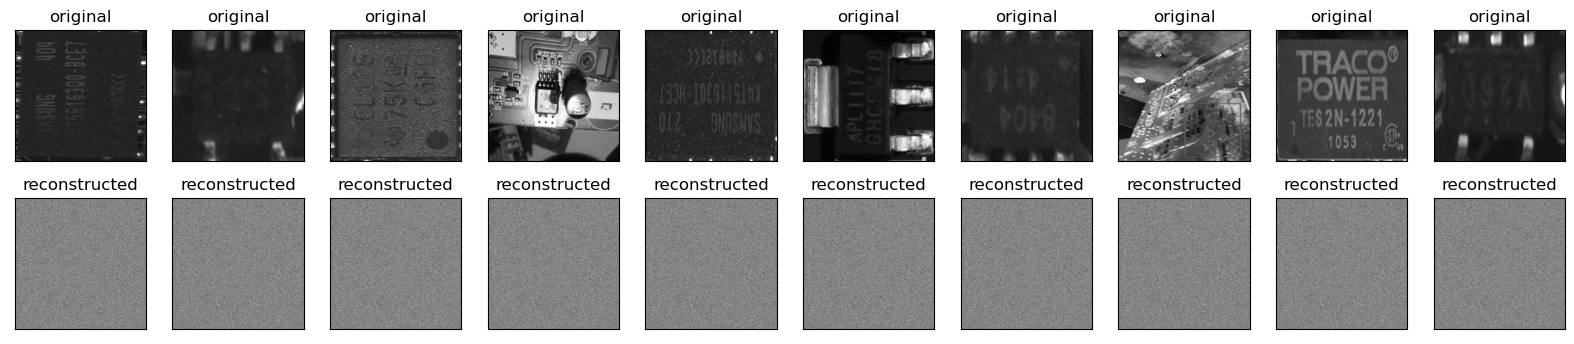

In [46]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

In [47]:

x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

print(x_train.shape)

(560, 400, 400, 1)


Adding random noise to the images

In [49]:
noise_factor = 0.1
x_train_noisy = x_train + noise_factor * tf.random.normal(shape=x_train.shape) 
x_test_noisy = x_test + noise_factor * tf.random.normal(shape=x_test.shape) 

x_train_noisy = tf.clip_by_value(x_train_noisy, clip_value_min=0., clip_value_max=1.)
x_test_noisy = tf.clip_by_value(x_test_noisy, clip_value_min=0., clip_value_max=1.)

Plot the noisy images.


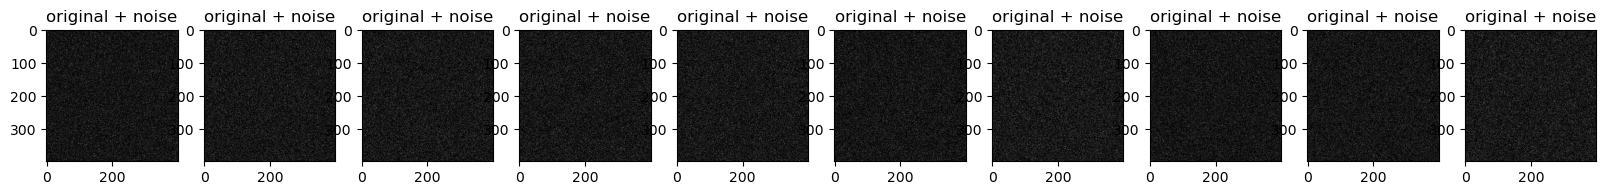

In [50]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.title("original + noise")
    plt.imshow(tf.squeeze(x_test_noisy[i]))
    plt.gray()
plt.show()

In [51]:
class Denoise(Model):
  def __init__(self):
    super(Denoise, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Input(shape=(50, 50, 1)),
      layers.Conv2D(16, (3, 3), activation='relu', padding='same', strides=2),
      layers.Conv2D(8, (3, 3), activation='relu', padding='same', strides=2)])

    self.decoder = tf.keras.Sequential([
      layers.Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2D(1, kernel_size=(3, 3), activation='sigmoid', padding='same')])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = Denoise()

In [52]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [53]:
x_train_noisy.shape

TensorShape([560, 400, 400, 1])

In [54]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=3,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Epoch 1/10


2022-10-28 12:54:44.988154: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


187/187 [==============================] - ETA: 0s - loss: 0.0477WARNING:tensorflow:Model was constructed with shape (None, 50, 50, 1) for input KerasTensor(type_spec=TensorSpec(shape=(None, 50, 50, 1), dtype=tf.float32, name='input_1'), name='input_1', description="created by layer 'input_1'"), but it was called on an input with incompatible shape (None, 400, 400, 1).


2022-10-28 12:54:53.383548: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


187/187 [==============================] - 9s 48ms/step - loss: 0.0477 - val_loss: 1.2409e-05
Epoch 2/10
187/187 [==============================] - 9s 46ms/step - loss: 3.1144e-06 - val_loss: 9.1092e-07
Epoch 3/10
187/187 [==============================] - 9s 46ms/step - loss: 5.8426e-07 - val_loss: 3.7835e-07
Epoch 4/10
187/187 [==============================] - 9s 46ms/step - loss: 2.8790e-07 - val_loss: 2.1737e-07
Epoch 5/10
187/187 [==============================] - 9s 47ms/step - loss: 1.7785e-07 - val_loss: 1.4354e-07
Epoch 6/10
187/187 [==============================] - 9s 47ms/step - loss: 1.2229e-07 - val_loss: 1.0241e-07
Epoch 7/10
187/187 [==============================] - 9s 47ms/step - loss: 8.9590e-08 - val_loss: 7.6843e-08
Epoch 8/10
187/187 [==============================] - 9s 46ms/step - loss: 6.8478e-08 - val_loss: 5.9741e-08
Epoch 9/10
187/187 [==============================] - 9s 46ms/step - loss: 5.3961e-08 - val_loss: 4.7680e-08
Epoch 10/10
187/187 [=============

Let's take a look at a summary of the encoder. Notice how the images are downsampled from 28x28 to 7x7.

In [79]:
autoencoder.encoder.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 25, 25, 16)        160       
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 13, 13, 8)         1160      
Total params: 1,320
Trainable params: 1,320
Non-trainable params: 0
_________________________________________________________________


The decoder upsamples the images back from 7x7 to 28x28.

In [80]:
autoencoder.decoder.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_transpose_6 (Conv2DTr (None, 50, 50, 8)         584       
_________________________________________________________________
conv2d_transpose_7 (Conv2DTr (None, 100, 100, 16)      1168      
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 100, 100, 1)       145       
Total params: 1,897
Trainable params: 1,897
Non-trainable params: 0
_________________________________________________________________


Plotting both the noisy images and the denoised images produced by the autoencoder.

In [81]:
encoded_imgs = autoencoder.encoder(x_test_noisy).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

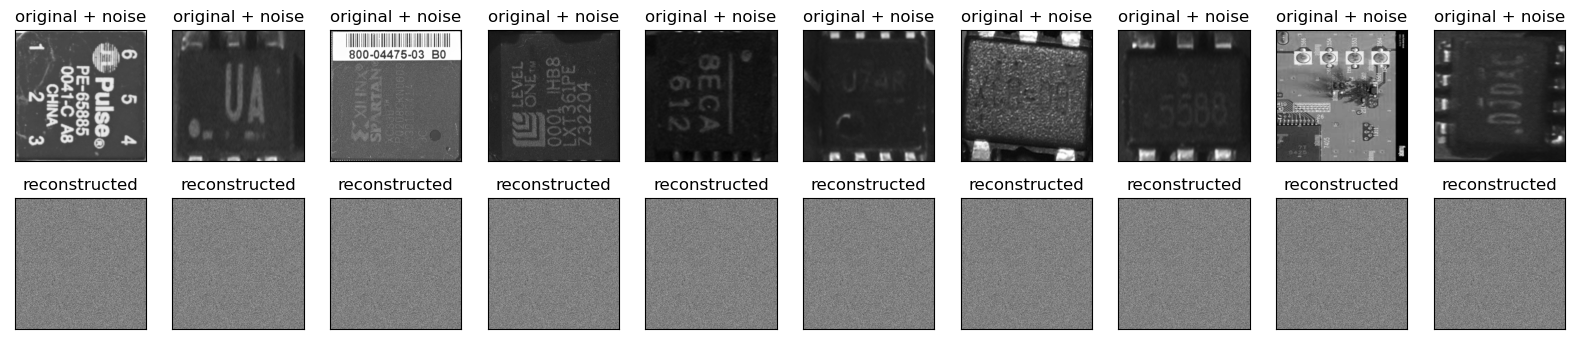

In [32]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):

    # display original + noise
    ax = plt.subplot(2, n, i + 1)
    plt.title("original + noise")
    plt.imshow(tf.squeeze(x_test_noisy[i]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    bx = plt.subplot(2, n, i + n + 1)
    plt.title("reconstructed")
    plt.imshow(tf.squeeze(decoded_imgs[i]))
    plt.gray()
    bx.get_xaxis().set_visible(False)
    bx.get_yaxis().set_visible(False)
plt.show()

In [83]:
X = X[:].reshape(len(X), IMG_SZE**2)
X.shape

(700, 10000)

In [84]:
# The last element contains the labels
labels = np.array([1 if it == 'good' else 0 for it in y])

# The other data points are the electrocadriogram data
data = X

train_data, test_data, train_labels, test_labels = train_test_split(
    data, labels, test_size=0.2, random_state=21
)

Normalize the data to `[0,1]`.


In [85]:
min_val = tf.reduce_min(train_data)
max_val = tf.reduce_max(train_data)

train_data = (train_data - min_val) / (max_val - min_val)
test_data = (test_data - min_val) / (max_val - min_val)

train_data = tf.cast(train_data, tf.float32)
test_data = tf.cast(test_data, tf.float32)

You will train the autoencoder using only the normal rhythms, which are labeled in this dataset as `1`. Separate the normal rhythms from the abnormal rhythms.

In [86]:
train_labels = np.array(train_labels).astype(bool)
test_labels = test_labels.astype(bool)

normal_train_data = train_data[train_labels]
normal_test_data = test_data[test_labels]

anomalous_train_data = train_data[~train_labels]
anomalous_test_data = test_data[~test_labels]

Plot a normal ECG. 

In [87]:
np.mean(anomalous_train_data[0], axis = 0)

0.428322

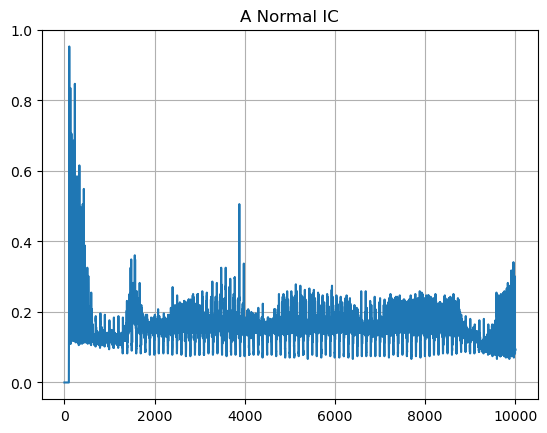

In [89]:
plt.grid()
plt.plot(np.arange(10000), normal_train_data[0])
plt.title("A Normal IC")
plt.show()

Plot an anomalous ECG.

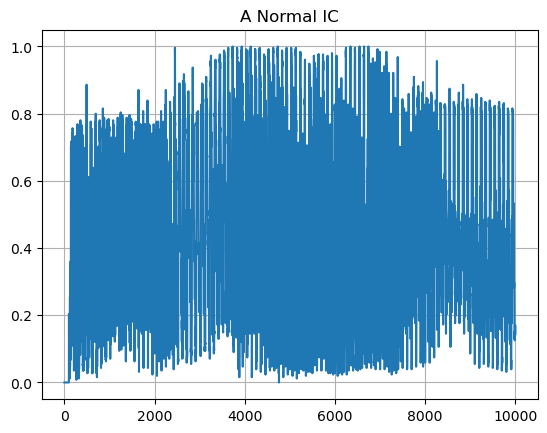

In [90]:
plt.grid()
plt.plot(np.arange(10000), anomalous_train_data[0])
plt.title("A Normal IC")
plt.show()

### Build the model

In [98]:
class AnomalyDetector(Model):
  def __init__(self):
    super(AnomalyDetector, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Dense(32, activation="relu"),
      layers.Dense(16, activation="relu"),
      layers.Dense(8, activation="relu")])
    
    self.decoder = tf.keras.Sequential([
      layers.Dense(16, activation="relu"),
      layers.Dense(32, activation="relu"),
      layers.Dense(10000, activation="sigmoid")])
    
  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = AnomalyDetector()

In [99]:
autoencoder.compile(optimizer='adam', loss='mae')

In [100]:
normal_train_data

<tf.Tensor: shape=(344, 10000), dtype=float32, numpy=
array([[0.        , 0.        , 0.        , ..., 0.09411766, 0.09411766,
        0.09411766],
       [0.        , 0.11764707, 0.12156864, ..., 0.10588236, 0.11764707,
        0.10980393],
       [0.        , 0.        , 0.        , ..., 0.20000002, 0.09803922,
        0.10196079],
       ...,
       [0.        , 0.        , 0.        , ..., 0.17254902, 0.34509805,
        0.16862746],
       [0.        , 0.47058827, 0.4156863 , ..., 0.30588236, 0.20784315,
        0.18823531],
       [0.        , 0.42352945, 0.41960788, ..., 0.2627451 , 0.28235295,
        0.28627452]], dtype=float32)>

Notice that the autoencoder is trained using only the normal ECGs, but is evaluated using the full test set.

In [1]:
history = autoencoder.fit(normal_train_data, normal_train_data, 
          epochs=20, 
          batch_size=5,
          validation_data=(test_data, test_data),
          shuffle=True)

NameError: name 'autoencoder' is not defined

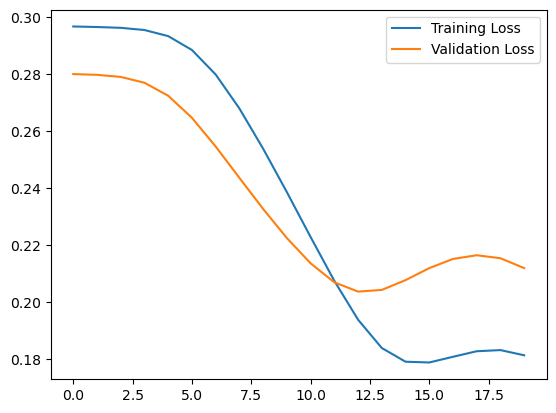

In [102]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()

You will soon classify an ECG as anomalous if the reconstruction error is greater than one standard deviation from the normal training examples. First, let's plot a normal ECG from the training set, the reconstruction after it's encoded and decoded by the autoencoder, and the reconstruction error.

In [103]:
normal_test_data[0]

<tf.Tensor: shape=(10000,), dtype=float32, numpy=
array([0.        , 0.        , 0.        , ..., 0.47450984, 0.19215688,
       0.13333334], dtype=float32)>

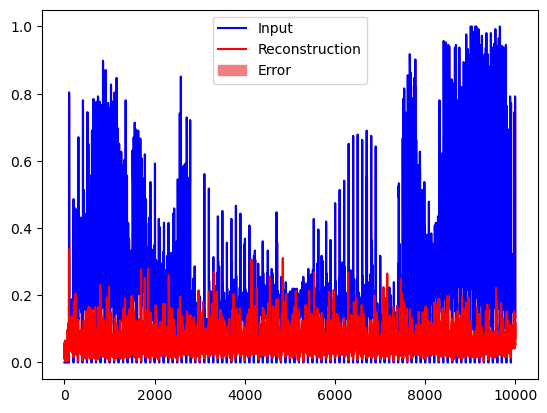

In [104]:
encoded_data = autoencoder.encoder(normal_test_data).numpy()
decoded_data = autoencoder.decoder(encoded_data).numpy()

plt.plot(normal_test_data[0], 'b')
plt.plot(decoded_data[0], 'r')
plt.fill_between(np.arange(10000), decoded_data[0], normal_test_data[0], color='lightcoral')
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

Create a similar plot, this time for an anomalous test example.

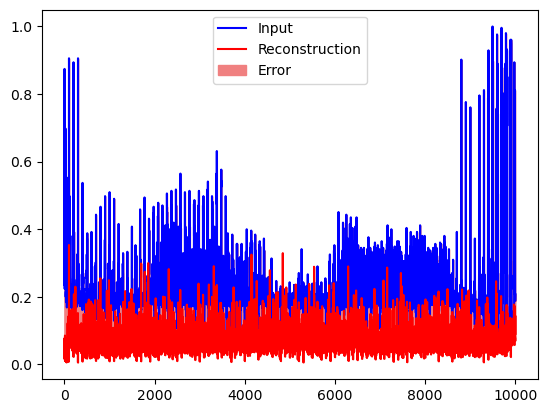

In [106]:
encoded_data = autoencoder.encoder(anomalous_test_data).numpy()
decoded_data = autoencoder.decoder(encoded_data).numpy()

plt.plot(anomalous_test_data[0], 'b')
plt.plot(decoded_data[0], 'r')
plt.fill_between(np.arange(10000), decoded_data[0], anomalous_test_data[0], color='lightcoral')
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

### Detect anomalies

Detect anomalies by calculating whether the reconstruction loss is greater than a fixed threshold. In this tutorial, you will calculate the mean average error for normal examples from the training set, then classify future examples as anomalous if the reconstruction error is higher than one standard deviation from the training set.


Plot the reconstruction error on normal ECGs from the training set

2022-10-28 11:44:24.370142: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


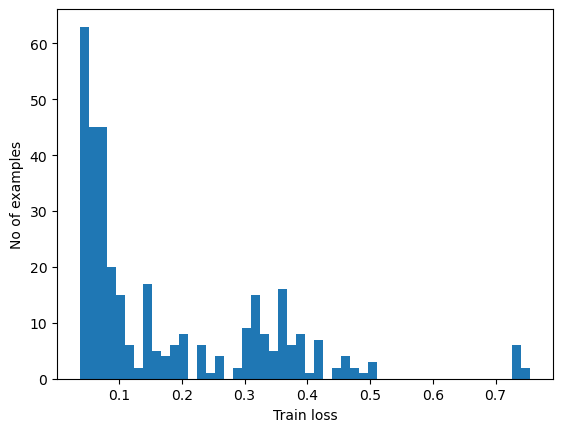

In [107]:
reconstructions = autoencoder.predict(normal_train_data)
train_loss = tf.keras.losses.mae(reconstructions, normal_train_data)

plt.hist(train_loss[None,:], bins=50)
plt.xlabel("Train loss")
plt.ylabel("No of examples")
plt.show()

In [108]:
threshold = np.mean(train_loss) + np.std(train_loss)
print("Threshold: ", threshold)

Threshold:  0.33474666


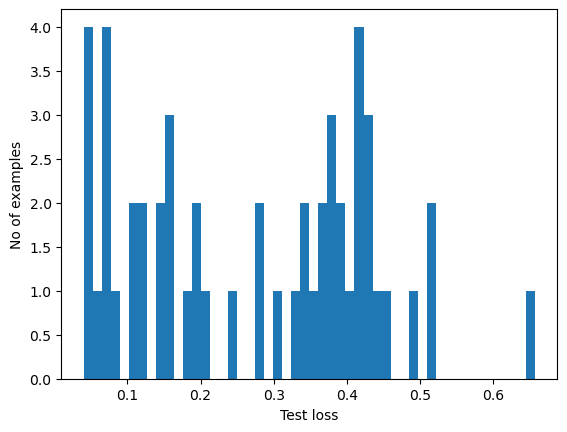

In [109]:
reconstructions = autoencoder.predict(anomalous_test_data)
test_loss = tf.keras.losses.mae(reconstructions, anomalous_test_data)

plt.hist(test_loss[None, :], bins=50)
plt.xlabel("Test loss")
plt.ylabel("No of examples")
plt.show()

In [ ]:
def predict(model, data, threshold):
  reconstructions = model(data)
  loss = tf.keras.losses.mae(reconstructions, data)
  return tf.math.less(loss, threshold)

def print_stats(predictions, labels):
  print("Accuracy = {}".format(accuracy_score(labels, predictions)))
  print("Precision = {}".format(precision_score(labels, predictions)))
  print("Recall = {}".format(recall_score(labels, predictions)))

In [ ]:
preds = predict(autoencoder, test_data, threshold)
print_stats(preds, test_labels)

Accuracy = 0.6928571428571428
Precision = 0.7227722772277227
Recall = 0.8295454545454546


Choose a threshold value that is one standard deviations above the mean.